In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

***Métricas de avaliação***

In [ ]:
class ClassificationMetrics():
  def accuracy(y, y_predito) -> float:
    return ((y == y_predito).sum() / y.shape[0])

  def precision(y, y_predito ) -> float:
    real = y.astype(bool)
    pred = y_predito.astype(bool)
    T = real == 1
    F = ~T
    TP = pred[T].sum()
    FP = (~pred[F]).sum()
    return (TP / (TP + FP))

  def recall(y, y_predito) -> float:
    real = y.astype(bool)
    pred = y_predito.astype(bool)
    T = real == True
    TP = pred[T].sum()
    FN = (~pred[T]).sum()
    return (TP / (TP + FN))

  def f1_score(y, y_predito) -> float:
    rec = ClassificationMetrics.recall(y, y_predito)
    prec = ClassificationMetrics.precision(y, y_predito)
    return (2 * (rec * prec) / (rec + prec))

***Questão 01***

**ITEM (A)**

***Importando os Dados***

In [ ]:
data = pd.read_csv("californiabin.csv", delimiter="," ,header= None )

X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

***Treino e teste***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***K-folds***

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

***SVM***

In [ ]:
svc_hiperparameters = {
    'SVC__gamma': [ 2 ** i for i in range(-15, 4) ],
    'SVC__C': [ 2 ** i for i in range(-5, 16) ]
}

svc_pipeline = Pipeline([('scaler', StandardScaler()), ('SVC', SVC(kernel='rbf'))])
svc_gs = GridSearchCV(svc_pipeline, svc_hiperparameters, cv=cv, return_train_score=True)
svc_gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                    8, 16, 32, 64, 128, 256, 512, 1024, 2048,
                                    4096, 8192, 16384, 32768],
                         'SVC__gamma': [3.0517578125e-05, 6.103515625e-05,
                                        0.0001220703125, 0.000244140625,
                                        0.00048828125, 0.0009765625,
                                        0.001953125, 0.00390625, 0.0078125,
                                        0.015625, 0.03125, 0.0625, 0.125, 0.25,
                                        0.5, 1, 2, 4, 8]},
             return_train_score=True)

***Random Forest***

In [ ]:
rf_hiperparameters = {
    'RF__n_estimators': list(range(10, 210, 10)),
    'RF__max_depth': [ 2, 4, 6, 8, None ]
}

rf_pipeline = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier())])
rf_gs = GridSearchCV(rf_pipeline, rf_hiperparameters, cv=cv, return_train_score=True)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__max_depth': [2, 4, 6, 8, None],
                         'RF__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100, 110, 120, 130, 140, 150,
                                              160, 170, 180, 190, 200]},
             return_train_score=True)

**ITEM (A)**

***Métricas para o SVM***

In [ ]:
best_svc = svc_gs.best_estimator_
svc_prediction = best_svc.predict(X_test)
print(f"""SVM:

Hiperparâmetros:
{svc_gs.best_params_}

Métricas:
Acurácia: { ClassificationMetrics.accuracy(y_test, svc_prediction) }
F1-score: { ClassificationMetrics.f1_score(y_test, svc_prediction) }
Precisão: { ClassificationMetrics.precision(y_test, svc_prediction) }
Revocação: { ClassificationMetrics.recall(y_test, svc_prediction) }
""")

SVM:

Hiperparâmetros:
{'SVC__C': 128, 'SVC__gamma': 0.001953125}

Métricas:
Acurácia: 0.8333333333333334
F1-score: 0.6446886446886447
Precisão: 0.528
Revocação: 0.8275862068965517



***Plotagem das métricas para o SVM***

[Text(0, 0, '0.833333'),
 Text(0, 0, '0.644689'),
 Text(0, 0, '0.528'),
 Text(0, 0, '0.827586')]

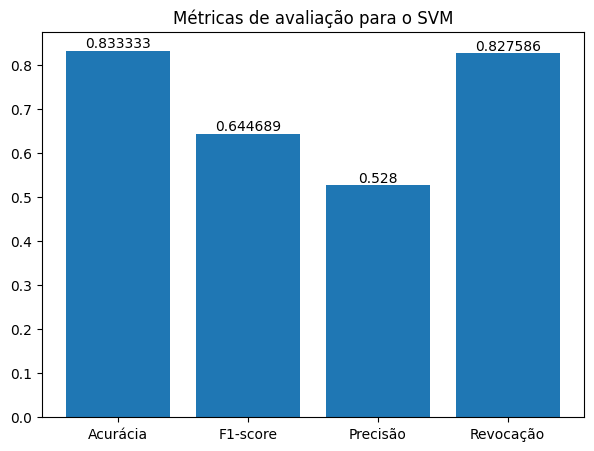

In [ ]:
fig, (ax0) = plt.subplots(1, 1, figsize=(7, 5))

ax0.set_title("Métricas de avaliação para o SVM")
sets = ['Acurácia', 'F1-score', 'Precisão', 'Revocação']
values = [ ClassificationMetrics.accuracy(y_test, svc_prediction), ClassificationMetrics.f1_score(y_test, svc_prediction), ClassificationMetrics.precision(y_test, svc_prediction), ClassificationMetrics.recall(y_test, svc_prediction)]
bar = ax0.bar(sets, values)
ax0.bar_label(bar)

***Métricas para Random Forest***

In [ ]:
best_rf = rf_gs.best_estimator_
rf_prediction = best_rf.predict(X_test)
print(f"""Random Forest:

Hiperparâmetros:
{rf_gs.best_params_}

Métricas:
Acurácia: { ClassificationMetrics.accuracy(y_test, rf_prediction) }
F1-score: { ClassificationMetrics.f1_score(y_test, rf_prediction) }
Precisão: { ClassificationMetrics.precision(y_test, rf_prediction) }
Revocação: { ClassificationMetrics.recall(y_test, rf_prediction) }
""")

Random Forest:

Hiperparâmetros:
{'RF__max_depth': None, 'RF__n_estimators': 120}

Métricas:
Acurácia: 0.8433333333333334
F1-score: 0.6424242424242423
Precisão: 0.5237154150197628
Revocação: 0.8307210031347962



***Plotagem das métricas para o ramdom forest***

[Text(0, 0, '0.843333'),
 Text(0, 0, '0.642424'),
 Text(0, 0, '0.523715'),
 Text(0, 0, '0.830721')]

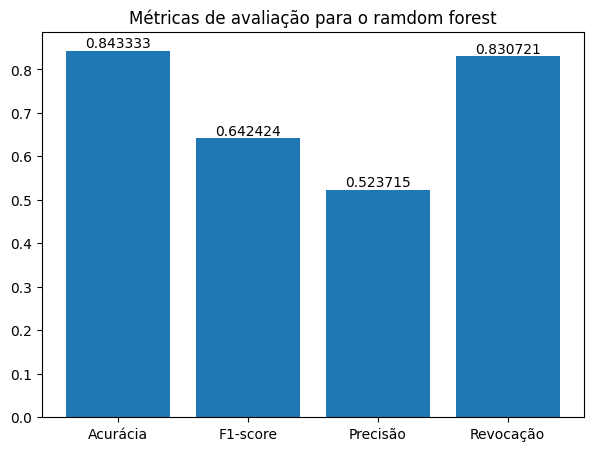

In [ ]:
fig, (ax0) = plt.subplots(1, 1, figsize=(7, 5))

ax0.set_title("Métricas de avaliação para o ramdom forest")
sets = ['Acurácia', 'F1-score', 'Precisão', 'Revocação']
values = [ ClassificationMetrics.accuracy(y_test, rf_prediction), ClassificationMetrics.f1_score(y_test, rf_prediction), ClassificationMetrics.precision(y_test, rf_prediction), ClassificationMetrics.recall(y_test, rf_prediction)]
bar = ax0.bar(sets, values)
ax0.bar_label(bar)

***Curvas ROC e Precision Recall***

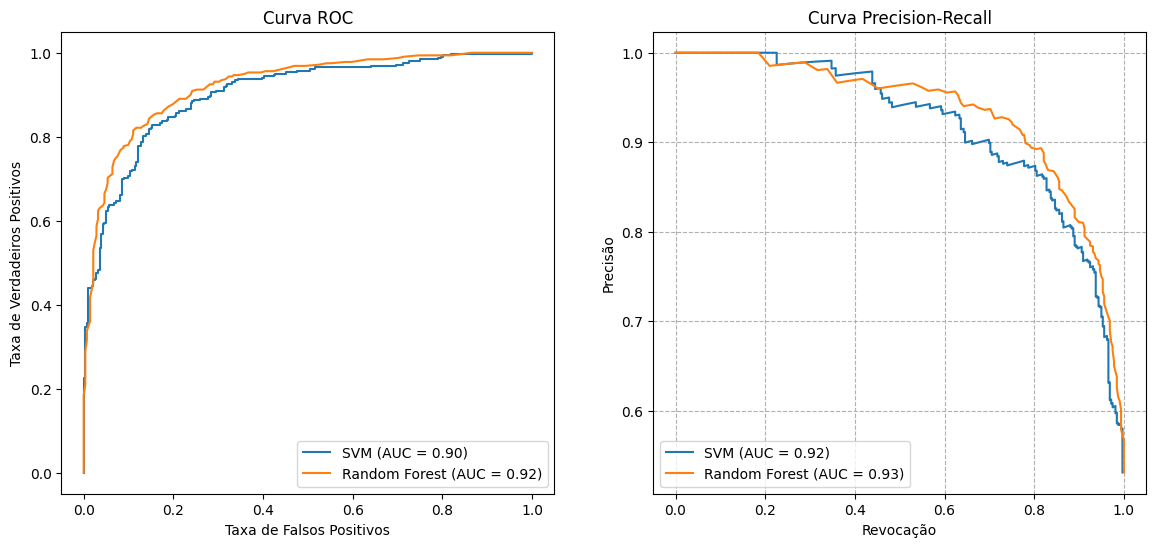

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

classifiers = {
  "SVM": best_svc,
  "Random Forest": best_rf
}

_, [roc_ax, pr_ax] = plt.subplots(1, 2, figsize=(14, 6))

for name, alg in classifiers.items():
    if name == "SVM":
        decision_scores = alg.decision_function(X_test)  # Pontuações de decisão do SVM
        y_pred_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())  # Normalização para obter as probabilidades de classe
    else:
        y_pred_prob = alg.predict_proba(X_test)[:, 1]  # Probabilidades de classe positiva

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    pr_ax.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')

roc_ax.set_xlabel('Taxa de Falsos Positivos')
roc_ax.set_ylabel('Taxa de Verdadeiros Positivos')
roc_ax.set_title('Curva ROC')
roc_ax.legend()

pr_ax.set_xlabel('Revocação')
pr_ax.set_ylabel('Precisão')
pr_ax.set_title('Curva Precision-Recall')
pr_ax.legend()

plt.grid(linestyle='--')
plt.show()
